In [2]:
import numpy as np
from scipy.stats import bernoulli

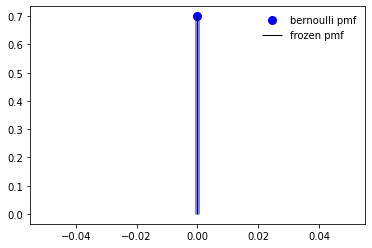

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)
p = 0.3

mean, var, skew, kurt = bernoulli.stats(p, moments='mvsk')
x = np.arange(bernoulli.ppf(0.01, p),

              bernoulli.ppf(0.99, p))

ax.plot(x, bernoulli.pmf(x, p), 'bo', ms=8, label='bernoulli pmf')

ax.vlines(x, 0, bernoulli.pmf(x, p), colors='b', lw=5, alpha=0.5)
rv = bernoulli(p)

ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1,

        label='frozen pmf')

ax.legend(loc='best', frameon=False)

plt.show()


In [7]:
r = bernoulli.rvs(p, size=1000)
r

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,

In [24]:
def generate_bernoulli(number_of_points, dims=2,  quiet=False):
    # Reproducability is important in Science
    

    

    # Generate random Parameters
    mu = np.random.uniform(low = 0,high = 1, size = dims)


    # Generate Dataset
    dataset = bernoulli.rvs(mu, size=number_of_points)
    return dataset

In [48]:
def init1(data, n_clusters):
    
    seed = 42
    high = data.max()
    low = data.min()
    rng = np.random.default_rng(seed)
   

    
    random_indices = np.random.randint(0, data.shape[0], n_clusters)
    mu = data.to_numpy()[random_indices,:]#center of distribution
    sigma = [np.cov(data.T) for _ in range(n_clusters)]#covariance matrix
    pi = np.full(shape=n_clusters, fill_value=1/n_clusters)
    
    return np.array(mu), sigma,np.array(pi)

In [125]:
def init2(data, n_clusters):
    
    seed = 42
    epsilon = 0.1
   
    rng = np.random.default_rng(seed)
    
    
    
    mu = [rng.uniform(low = epsilon, high = 1 - epsilon, size = data.shape[1]) for _ in range(n_clusters)]
    
    
    sigma = [np.cov(data.T) for _ in range(n_clusters)]#covariance matrix
    pi = np.full(shape=n_clusters, fill_value=1/n_clusters)
    
    return np.array(mu), np.array(sigma),np.array(pi)

In [126]:
def init3(data, n_clusters):
    
    seed = 42
    high = data.max()
    low = data.min()
    rng = np.random.default_rng(seed)
    alpha = 0.75
    

    mu_rand, _, _ = init1(data, n_clusters)
    mu_p, _, _ = init2(data, n_clusters)

    
    mu = alpha*mu_rand + (1 -alpha)*mu_p
    sigma = [np.cov(data.T) for _ in range(n_clusters)]#covariance matrix
    pi = np.full(shape=n_clusters, fill_value=1/n_clusters)
    #pi, weights of each component
    #responsibility = np.full(shape = data.shape, fill_value = 1/n_clusters)
    return np.array(mu), np.array(sigma),np.array(pi)

In [65]:
def prob(x,mu_k):
    L = []
    for i in range(len(x)):
        L.append((mu_k[i]**x[i])*((1 - mu_k[i])**(1 - x[i])))
    return np.prod(np.array(L))


In [118]:
def e_step(n_comp, prototypes, data, pi):
    R_matrix = np.zeros((data.shape[0], n_comp))
    for k in range(n_comp):
        mu_k = prototypes[k]
        R_matrix[:,k] = np.array([prob(data.iloc[i], mu_k) for i in range(len(data))])
    numerator = R_matrix*pi
    
    denominator = numerator.sum(axis = 1)[:, np.newaxis] 
    denominator = denominator 
    

    responsibility = numerator/denominator
    return responsibility    
        
        


In [145]:
def m_step(data,prototypes,sigma, pi, n_comp, responsibility):
    cov = np.zeros_like(sigma)

    for i in range(n_comp):
        mu_k = prototypes[i]
        weight = responsibility[:, [i]]
        total_weight = weight.sum()
        prototypes[i] = ((data * weight) ).sum(axis=0) / total_weight
        
       
        cov[i] = np.diagflat(np.array([mu_k[n]*(1- mu_k[n]) for n in range(data.shape[1])]))
        pi[i] = responsibility[:,i].sum()/len(data)
    return np.array(prototypes), np.array(pi), np.array(cov)

In [68]:
np.diagflat(np.array([1,2,3]), k=0)

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [146]:
def log_likelihood(data, n_comp, pi, prototypes, responsibility):
    eps = 1e-8
    #likelihood = np.array([scipy.stats.multivariate_normal(mean = mu, cov = sigma, allow_singular= True).pdf(data) for mu, sigma in zip(mu, sigma)])
    #weighted_likelihood =  np.log(likelihood + eps).T +np.log(pi) 
    #amount = [] 
    #p = weighted_likelihood.sum(0)
    likelihood_loss = []
    for k in range(n_comp):
        probabilities = np.array([prob(data.iloc[i], prototypes[k]) for i in range(len(data))])
        likelihood = pi[k] * probabilities
        inner = (responsibility[:,k] * np.log(likelihood +eps)).sum()
        likelihood_loss.append(inner.sum())
    return np.sum(np.array(likelihood_loss))

In [147]:
def bmm(data, max_iter, n_comp):
    iter = 0
    prototypes, sigma, pi= init2(data, n_comp)
    l = []
    while iter < max_iter:
        responsibility = e_step(n_comp, prototypes, data, pi)
        prototypes, pi, sigma = m_step(data,prototypes,sigma, pi, n_comp, responsibility)
        loss = log_likelihood(data, n_comp, pi, prototypes, responsibility)
        l.append(loss)
        
        iter += 1
        print(f'loss: {loss}')
        plt.plot(l)
        plt.xlabel('Number of Iterations')
        plt.ylabel('log_likelihood')
        plt.title('loss plot')
    return np.argmax(np.array(responsibility), axis = 1)

In [1]:
from sklearn.datasets import load_digits
import pandas as pd
digits = load_digits()

In [2]:
data1 = pd.DataFrame(digits.data)

In [3]:
data1

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [72]:
mnist3 = (data1/16).astype('int')

In [73]:
mnist3.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [74]:
mnist3.sum(axis = 1)

0        0
1       11
2        7
3        0
4        5
        ..
1792     9
1793    12
1794    10
1795    10
1796     7
Length: 1797, dtype: int64

In [75]:
mnist3.shape

(1797, 64)

In [76]:
init1(mnist3, 5)

(array([[0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
         0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
        [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
         0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
         0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [77]:
init2(mnist3, 5)

(array([[0.71916484, 0.45110275, 0.78687834, 0.65789442, 0.17534188,
         0.88049788, 0.70891176, 0.72885144, 0.20249091, 0.46030875,
         0.39663842, 0.84141199, 0.6150921 , 0.75820929, 0.45473136,
         0.28179098, 0.54366783, 0.1510538 , 0.76210494, 0.60533152,
         0.70647019, 0.38362077, 0.87655842, 0.8144969 , 0.7227068 ,
         0.25571097, 0.4733768 , 0.13504301, 0.22343159, 0.64643916,
         0.69580972, 0.87400779, 0.36066029, 0.39636776, 0.47564465,
         0.25157709, 0.2039372 , 0.48056394, 0.28152748, 0.6358512 ,
         0.44972154, 0.76614256, 0.66021208, 0.34989331, 0.76580784,
         0.74381149, 0.4099827 , 0.33066248, 0.6459964 , 0.21180199,
         0.25992656, 0.10588982, 0.7295395 , 0.63188069, 0.6641323 ,
         0.72458322, 0.46713262, 0.55499296, 0.2118376 , 0.19162406,
         0.63472237, 0.47687696, 0.55218889, 0.71199909],
        [0.60777466, 0.54286352, 0.54736573, 0.34316008, 0.12465427,
         0.44937391, 0.27166774, 0.42682291, 

In [78]:
init3(mnist3, 5)

(array([[0.17979121, 0.11277569, 0.19671958, 0.16447361, 0.04383547,
         0.22012447, 0.17722794, 0.18221286, 0.05062273, 0.11507719,
         0.8491596 , 0.960353  , 0.15377302, 0.18955232, 0.11368284,
         0.07044774, 0.13591696, 0.03776345, 0.19052623, 0.15133288,
         0.17661755, 0.09590519, 0.2191396 , 0.20362422, 0.1806767 ,
         0.06392774, 0.1183442 , 0.03376075, 0.0558579 , 0.16160979,
         0.17395243, 0.21850195, 0.09016507, 0.09909194, 0.11891116,
         0.06289427, 0.0509843 , 0.12014099, 0.07038187, 0.1589628 ,
         0.11243038, 0.19153564, 0.16505302, 0.08747333, 0.19145196,
         0.18595287, 0.10249568, 0.08266562, 0.1614991 , 0.0529505 ,
         0.06498164, 0.02647245, 0.18238488, 0.90797017, 0.16603308,
         0.18114581, 0.11678316, 0.13874824, 0.0529594 , 0.04790601,
         0.15868059, 0.11921924, 0.13804722, 0.17799977],
        [0.15194366, 0.13571588, 0.13684143, 0.08579002, 0.03116357,
         0.11234348, 0.06791693, 0.10670573, 

In [112]:
m, n, p = init2(mnist3, 5)

In [123]:
rr = e_step(5,m, mnist3, p )

In [137]:
rr.shape

(1797, 5)

In [117]:
prob(mnist3.iloc[1], m[4])

1.0682603099735802e-21

In [111]:
mnist3.iloc[1].sum()

11

In [130]:
m_step(mnist3, m, n, p, 5, rr)

(array([[0.00000000e+00, 0.00000000e+00, 1.04621221e-02, 9.43472560e-02,
         2.26750945e-01, 2.08648639e-01, 1.47616503e-02, 0.00000000e+00,
         0.00000000e+00, 1.33960321e-04, 3.13679983e-01, 7.63886635e-01,
         6.70739703e-01, 5.12526794e-01, 9.26735651e-02, 0.00000000e+00,
         0.00000000e+00, 2.14206664e-05, 5.08472653e-01, 4.80489915e-01,
         5.24080687e-01, 4.92673428e-01, 2.52592125e-03, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 4.14559590e-01, 8.79386835e-02,
         1.32632200e-01, 3.17233515e-01, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 1.96760326e-01, 3.75927397e-02,
         8.10452496e-02, 4.42849137e-01, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 6.05356248e-03, 1.70052762e-01, 6.93001815e-02,
         2.23245579e-01, 3.65750975e-01, 2.43443619e-03, 0.00000000e+00,
         0.00000000e+00, 5.55465420e-06, 7.55193695e-02, 1.84255804e-02,
         3.31111489e-01, 3.72050356e-01, 1.27457818

loss: -26329.882920820084
loss: -25999.15539452168
loss: -25384.610227717352
loss: -24798.53099321753
loss: -24469.806971068287
loss: -24284.560672786916
loss: -24186.047713048978
loss: -24115.232747871913
loss: -24047.90319623988
loss: -23983.887606060598


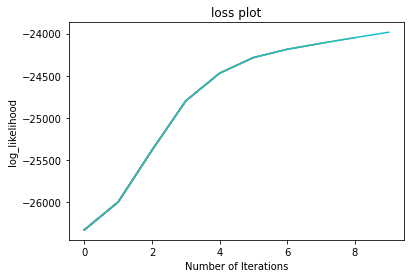

In [158]:
a = bmm(mnist3, 10, 10)

In [154]:
def show(image):
    '''
    Function to plot the MNIST data
    '''
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    imgplot = ax.imshow(image, cmap=plt.cm.Greys)
    imgplot.set_interpolation('nearest')
    ax.xaxis.set_ticks_position('top')
    ax.yaxis.set_ticks_position('left')
    plt.show()


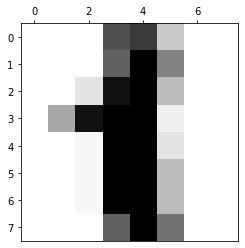

In [157]:
show(np.array(data1.iloc[1]).reshape((8,8)))

In [162]:
b = list(a)

In [163]:
b

[4,
 8,
 4,
 4,
 4,
 7,
 4,
 1,
 7,
 4,
 4,
 9,
 1,
 1,
 4,
 3,
 8,
 4,
 7,
 7,
 0,
 9,
 7,
 4,
 0,
 4,
 4,
 4,
 1,
 7,
 4,
 7,
 3,
 3,
 4,
 3,
 4,
 7,
 1,
 7,
 1,
 4,
 8,
 4,
 1,
 7,
 3,
 9,
 4,
 4,
 4,
 1,
 1,
 7,
 4,
 4,
 9,
 4,
 4,
 7,
 7,
 1,
 7,
 7,
 4,
 4,
 4,
 4,
 4,
 1,
 9,
 7,
 0,
 0,
 7,
 4,
 7,
 1,
 7,
 7,
 9,
 1,
 4,
 1,
 7,
 9,
 4,
 1,
 8,
 5,
 9,
 5,
 0,
 9,
 1,
 8,
 7,
 4,
 5,
 8,
 4,
 4,
 3,
 1,
 4,
 4,
 4,
 7,
 1,
 3,
 4,
 4,
 1,
 2,
 7,
 1,
 1,
 3,
 1,
 7,
 7,
 4,
 1,
 8,
 4,
 7,
 4,
 1,
 0,
 8,
 4,
 0,
 7,
 7,
 9,
 3,
 4,
 1,
 7,
 7,
 0,
 9,
 7,
 7,
 4,
 3,
 4,
 6,
 4,
 0,
 4,
 0,
 6,
 1,
 9,
 3,
 8,
 6,
 8,
 0,
 0,
 7,
 3,
 3,
 4,
 3,
 4,
 0,
 4,
 7,
 7,
 8,
 9,
 1,
 1,
 5,
 3,
 0,
 4,
 4,
 7,
 7,
 1,
 7,
 7,
 0,
 9,
 7,
 4,
 0,
 7,
 6,
 1,
 7,
 8,
 4,
 4,
 4,
 4,
 0,
 9,
 3,
 4,
 0,
 3,
 1,
 7,
 7,
 4,
 4,
 9,
 6,
 4,
 5,
 7,
 9,
 6,
 1,
 0,
 5,
 0,
 9,
 1,
 8,
 8,
 9,
 5,
 9,
 9,
 7,
 7,
 1,
 4,
 0,
 4,
 9,
 8,
 3,
 8,
 8,
 7,
 8,
 8,
 7,
 7,
 1,
 3,
 9,
 8,
 8,
